In [3]:
!pip install kaggle

In [4]:
import kaggle

In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [6]:
api = KaggleApi ()
api.authenticate ()

In [7]:
api.competition_download_file('sberbank-russian-housing-market', 'train.csv.zip')

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from zipfile import ZipFile


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
# unzip the file 
zip = ZipFile('train.csv.zip')
zip.extractall()
zip.close()

In [9]:
# read the data
df = pd.read_csv('train.csv')

In [10]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [11]:
df.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [12]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_columns = df_numeric.columns.values
print(numeric_columns)
print(numeric_columns.shape)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

In [13]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_columns = df_non_numeric.columns.values
print(non_numeric_columns)
print(non_numeric_columns.shape)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']
(16,)


Text(87.0, 0.5, 'Rows')

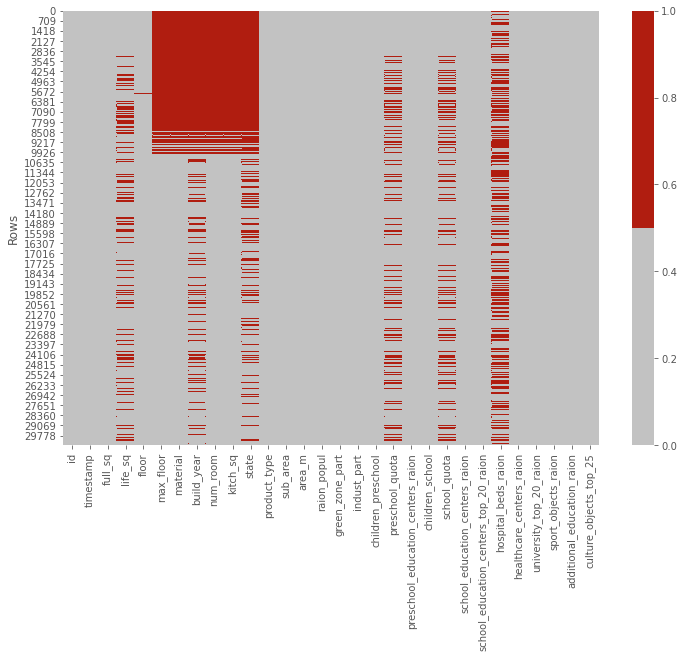

In [14]:
cols = df.columns[:30] # first 30 columns
colours = ['#c2c2c2','#b01d10'] # specify the colours - red is missing. gray is not missing
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.ylabel('Rows')

In [15]:
#  percentage of missing values 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 21%
floor - 1%
max_floor - 31%
material - 31%
build_year - 45%
num_room - 31%
kitch_sq - 31%
state - 44%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 22%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 22%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 47%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

<AxesSubplot:xlabel='index'>

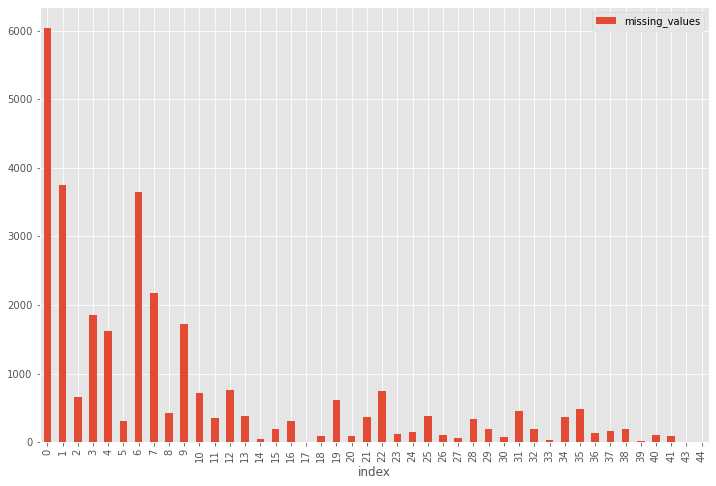

In [16]:
# creating the missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plotting the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['missing_values'] = df[ismissing_cols].sum(axis=1)

df['missing_values'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='missing_values')

In [17]:
# removing rows with more than 35 of missing values
ind_missing = df[df['missing_values'] > 35].index
df2 = df.drop(ind_missing, axis=0)

In [18]:
# removing the hospital_beds_raion attribute due to the high percentege of missing data
cols_to_drop = ['hospital_beds_raion']
df2 = df2.drop(cols_to_drop, axis=1)

In [19]:
# replacing the missing values of life_sq attribute with the median
med = df2['life_sq'].median()
print(med)
df2['life_sq'] = df2['life_sq'].fillna(med)

30.0


In [22]:
# Checking if any rows are missing any data.
df2.isnull().sum()

id                                         0
timestamp                                  0
full_sq                                    0
life_sq                                    0
floor                                    163
                                        ... 
prom_part_5000_ismissing                   0
cafe_sum_5000_min_price_avg_ismissing      0
cafe_sum_5000_max_price_avg_ismissing      0
cafe_avg_price_5000_ismissing              0
missing_values                             0
Length: 343, dtype: int64

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

<AxesSubplot:xlabel='index'>

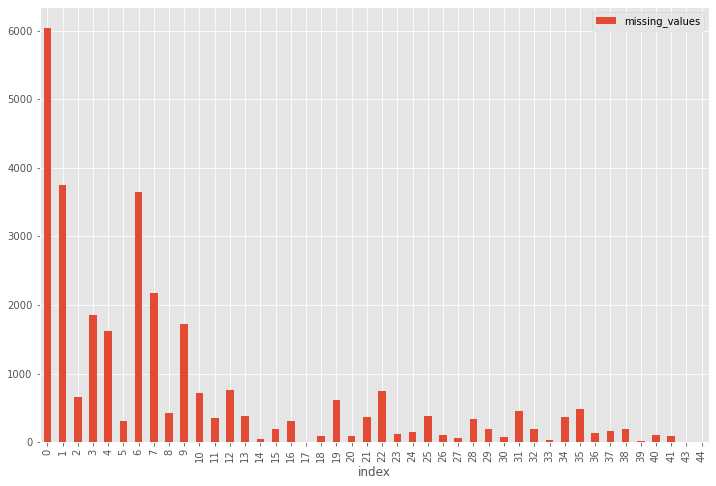

In [32]:
# creating the missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plotting the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['missing_values'] = df[ismissing_cols].sum(axis=1)

df['missing_values'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='missing_values')

Text(87.0, 0.5, 'Rows')

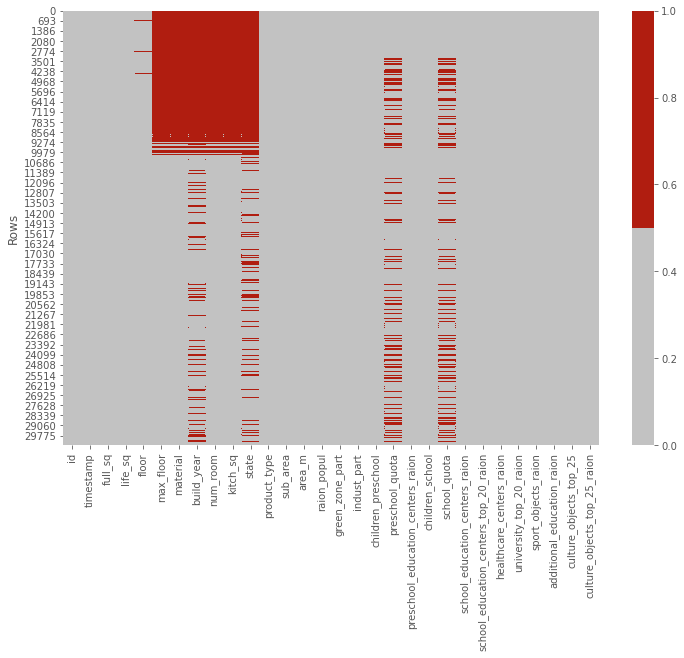

In [24]:
cols = df2.columns[:30] # first 30 columns
colours = ['#c2c2c2','#b01d10'] # specify the colours - red is missing. gray is not missing
sns.heatmap(df2[cols].isnull(), cmap=sns.color_palette(colours))
plt.ylabel('Rows')

Text(0, 0.5, 'Frequency')

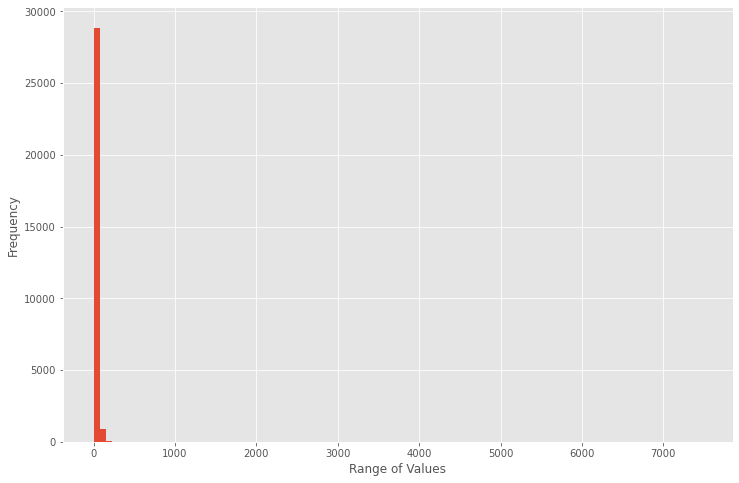

In [25]:
# creating the life_sq histogram 
df2['life_sq'].hist(bins=100)
plt.xlabel('Range of Values')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

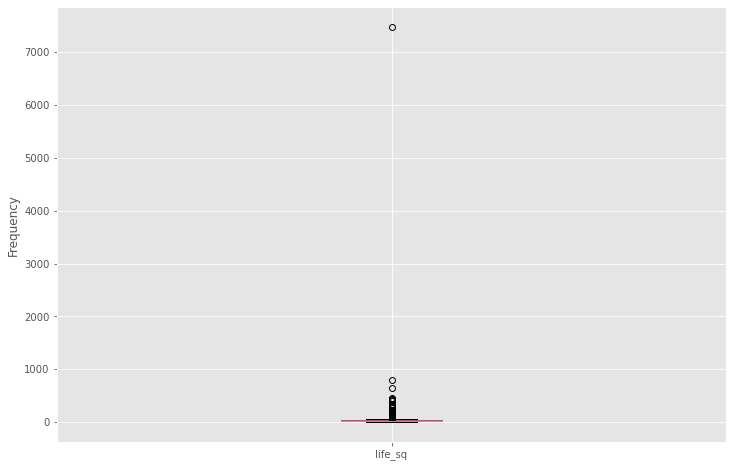

In [26]:
# creating the life_sq box plot
df2.boxplot(column=['life_sq'])    
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

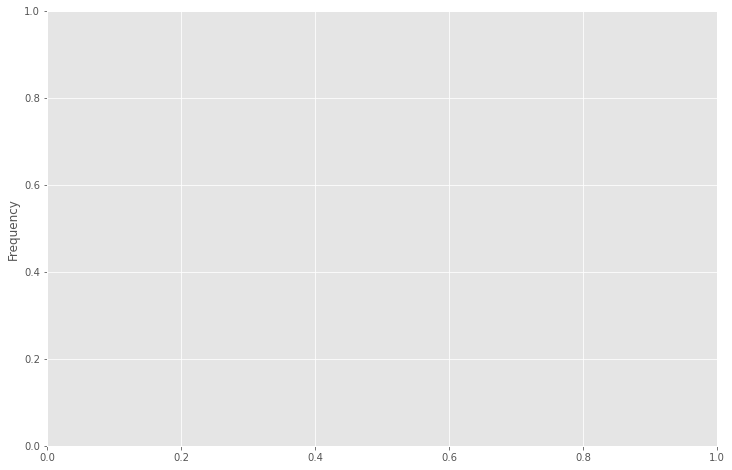

In [27]:
# # creating the life_sq outlier descriptive 
df2['life_sq'].describe()
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

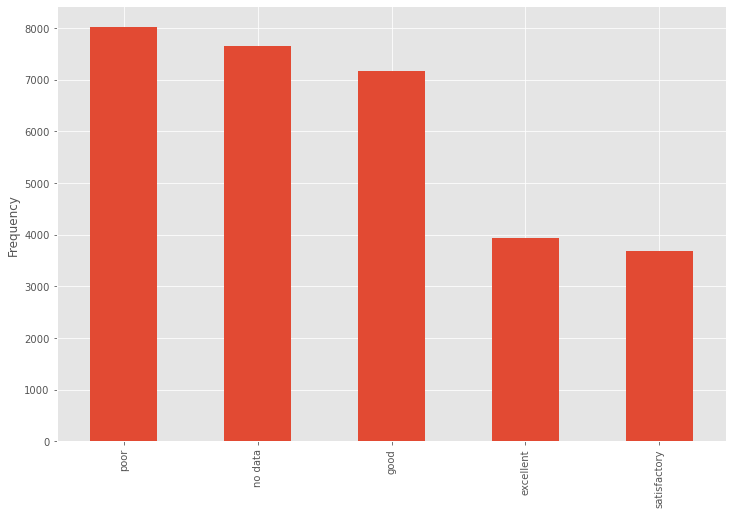

In [28]:
# creating a Bar Chart of the ecology attribute
df['ecology'].value_counts().plot.bar()
plt.ylabel('Frequency')

In [29]:
# creating a list of attributes with a high percentage of repetitive data 
num_rows = len(df2.index)
low_information_cols = [] #
for col in df2.columns:
    cnts = df2[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.00601%
no     29483
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.18523%
no     28643
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.10198%
no     28916
yes      863
Name: nuclear_reactor_raion, dtype: int64

big_road1_1line: 97.38070%
no     28999
yes      780
Name: big_road1_1line, dtype: int64

railroad_1line: 97.00460%
no     28887
yes      892
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.19265%
0    28943
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.49965%
0    29630
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.42295%
0    28416
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosque_count_1000: 98.03889%
0    29195
1      584
Name: mosque_count_1000, dtype: int64

mosque_count_1500: 96.13150%
0    28

In [31]:
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(30471, 344)
(30461, 343)


In [33]:

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(30)

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2014-04-15  134       134.0   1.0     0.0         3.0      5798496      2
2015-03-30  41        41.0    11.0    2016.0      1.0      4114580      2
2015-03-14  62       -999.0   2.0    -999.0       2.0      6520500      2
2012-09-05  43       -999.0   21.0   -999.0      -999.0    6229540      2
2014-12-09  40       -999.0   17.0   -999.0       1.0      4607265      2
2013-06-24  40       -999.0   12.0   -999.0      -999.0    4112800      2
2013-08-30  40       -999.0   12.0   -999.0       1.0      4462000      2
2013-09-23  85       -999.0   14.0   -999.0       3.0      7725974      2
2012-08-27  59       -999.0   6.0    -999.0      -999.0    4506800      2
2014-01-22  46        28.0    1.0     1968.0      2.0      3000000      2
2012-10-22  61       -999.0   18.0   -999.0      -999.0    8248500      2
2013-04-03  42       -999.0   2.0    -999.0      -999.0    3444000      2
2014-12-17  62       -999.0   9.0    -999.0

In [34]:
# drop duplicates based on an subset of variables.

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 344)
(30455, 344)


In [35]:
df['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

In [38]:
df ['timestamp']

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
30466    2015-06-30
30467    2015-06-30
30468    2015-06-30
30469    2015-06-30
30470    2015-06-30
Name: timestamp, Length: 30471, dtype: object

In [39]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: year, dtype: int64

12    3400
4     3191
3     2972
11    2970
10    2736
6     2570
5     2496
9     2346
2     2275
7     1875
8     1831
1     1809
Name: month, dtype: int64


In [47]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['toroonto', 'toronto', 'tonro', 'vancouver', 'vancuver', 'vancouvr', 
                                         'montreal', 'calgary']})


df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,toroonto,1,8
1,toronto,0,8
2,tonro,3,7
3,vancouver,8,0
4,vancuver,8,1
5,vancouvr,7,1
6,montreal,7,8
7,calgary,7,8


In [48]:
msk = df_city_ex['city_distance_toronto'] <= 3
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 3
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,toronto,1,8
1,toronto,0,8
2,toronto,3,7
3,vancouver,8,0
4,vancouver,8,1
5,vancouver,7,1
6,montreal,7,8
7,calgary,7,8


In [57]:
# Because the dataset does not have an address column , one was created for illustration purposes
df_address_column = pd.DataFrame(['486 PACIFIC St Apartment 78', '784 MAIN Street APT 45   ', 
                          '258 FirSt Av', '  23 FIRst AVE.'], columns=['address'])
df_address_column

,address
0,486 PACIFIC St Apartment 78
1,784 MAIN Street APT 45
2,258 FirSt Av
3,23 FIRst AVE.


In [58]:
df_address_column['address_std'] = df_address_column['address'].str.lower() # chaging the data to lowercase 
df_address_column['address_std'] = df_address_column['address_std'].str.strip() # removing leading and trailing whitespace.
df_address_column['address_std'] = df_address_column['address_std'].str.replace('\\.', '') # removing period.
df_address_column['address_std'] = df_address_column['address_std'].str.replace('\\bstreet\\b', 'st') # replacing street with st.
df_address_column['address_std'] = df_address_column['address_std'].str.replace('\\bapartment\\b', 'apt') # replacing apartment with apt.
df_address_column['address_std'] = df_address_column['address_std'].str.replace('\\bav\\b', 'ave') # replacing apartment with apt.

df_address_column

<ipython-input-58-f5a08eeb34c9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_address_column['address_std'] = df_address_column['address_std'].str.replace('\\.', '') # removing period.
<ipython-input-58-f5a08eeb34c9>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_address_column['address_std'] = df_address_column['address_std'].str.replace('\\bstreet\\b', 'st') # replacing street with st.
<ipython-input-58-f5a08eeb34c9>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_address_column['address_std'] = df_address_column['address_std'].str.replace('\\bapartment\\b', 'apt') # replacing apartment with apt.
<ipython-input-58-f5a08eeb34c9>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_address_column['address_std'] = df_address_column['address_std'].str.replace('\\bav\\b', 'ave')

,address,address_std
0,486 PACIFIC St Apartment 78,486 pacific st apt 78
1,784 MAIN Street APT 45,784 main st apt 45
2,258 FirSt Av,258 first ave
3,23 FIRst AVE.,23 first ave
